In [1]:
%pylab inline

import zap_util as z

import statsmodels.api as sm
import statsmodels.formula.api as smf
rmse = {}
z.set_style()

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = z.get_imoveis_dataframe(False)


In [4]:
df2 = df[df.bairro_g == 'Barra da Tijuca']
var_ignore = ['bairro_g']
f,_,e = z.prep_formula(df2,'df2', cat=['suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: id_bairro_g,bairro_g,preco,m2


Fórmula: df2.preco  ~ df2.dm_esquina + C(df2.quartos) + df2.dm_closet + df2.dist_saude_privada + df2.dm_armario + df2.se_anos_estudo + df2.dm_recuado + df2.dm_fundos + df2.dm_andar_alto + df2.dm_mezanino + df2.dm_piscina + df2.dm_playground + df2.dist_centro_lng + df2.dm_hidrometro + df2.lng + df2.dm_seguranca + df2.dist_trem + df2.dist_lagoa + C(df2.suites) + df2.dm_sol_da_manha + df2.area + df2.dm_frente + df2.dist_delegacia + df2.dist_centro_lat + df2.dm_blindex + df2.dist_favela + df2.dist_logradouro + df2.dm_terraco + df2.dm_salao_de_jogos + df2.se_idh + df2.dist_centro + df2.dm_sala_de_jantar + df2.dm_dependencia + df2.se_crm_violento + df2.dm_estacionamento_visitantes + df2.dm_banheira + df2.dist_saude_publica + df2.dist_bombeiro + df2.dm_jardim + C(df2.garagem) + df2.dist_praia + df2.dm_duplex + df2.dm_andar_inteiro + df2.dm_sol_da_tarde + df2.condominio + df2.lat + df2.dm_varanda + df2.dm_triplex + df2.dm_children_care + df2

In [5]:
lm = sm.formula.ols(f, df2).fit()
rmse['default'] = z.rmse(lm.resid)
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:              df2.preco   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     383.1
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        18:10:14   Log-Likelihood:                -45019.
No. Observations:                6262   AIC:                         9.018e+04
Df Residuals:                    6193   BIC:                         9.064e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

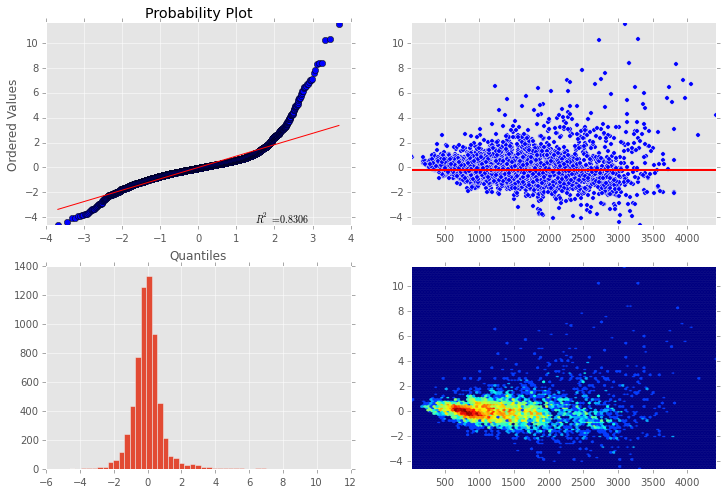

In [6]:
z.plot_residual(lm)

In [7]:
z.print_autocorr(df,['id_bairro_g'])

Coluna               | Autocorrelacionada com                            
se_anos_estudo       : ['se_idh(0.95)', 'se_renda(0.87)', 'se_perc_alfabetizacao(0.89)']
dm_frente            : ['dm_varanda(0.70)', 'dm_salao_de_festas(0.73)']  
dist_delegacia       : ['dist_centro(0.82)', 'dist_metro(0.87)']         
dist_centro_lng      : ['lng(-1.00)', 'dist_delegacia(0.79)', 'dist_centro(0.97)', 'se_saneamento(-0.80)', 'dist_metro(0.92)']
preco                : ['area(0.71)', 'm2(0.71)']                        
se_saneamento        : ['dist_metro(-0.79)']                             
lng                  : ['dist_delegacia(-0.79)', 'dist_centro(-0.97)', 'se_saneamento(0.80)', 'dist_metro(-0.92)']
dist_centro          : ['se_saneamento(-0.79)', 'dist_metro(0.96)']      
se_idh               : ['se_renda(0.77)', 'se_perc_alfabetizacao(0.89)'] 
dist_trem            : ['dist_delegacia(0.74)', 'dist_centro_lat(0.91)', 'dist_centro(0.71)', 'lat(-0.80)', 'dist_metro(0.79)']
dist_lagoa           : 

In [8]:
var_ignore += ['id_bairro_g', 'se_anos_estudo','dm_piscina', 'dist_lagoa', 
    'dm_frente','dist_centro_lat','dist_centro_lng','dist_delegacia',
    'se_idh','preco','m2','dist_metro','dist_trem','dist_centro',
    'se_saneamento',]
z.print_autocorr(df, var_ignore)

Não há colunas autocorrelacionadas.


In [9]:
f,_,e = z.prep_formula(df2,'df2', cat=['suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: se_anos_estudo,preco,dm_piscina,bairro_g,dist_centro_lat,dist_trem,dist_lagoa,dm_frente,dist_delegacia,dist_centro_lng,m2,id_bairro_g,se_saneamento,se_idh,dist_centro,dist_metro


Fórmula: df2.preco  ~ df2.dm_esquina + C(df2.quartos) + df2.dm_closet + C(df2.suites) + df2.dm_armario + df2.se_crm_violento + df2.dm_recuado + df2.dm_fundos + df2.dm_andar_alto + df2.dm_mezanino + df2.dm_playground + df2.dm_hidrometro + df2.lng + df2.dm_seguranca + df2.se_renda + df2.dm_sol_da_manha + df2.area + df2.dist_saude_privada + df2.dm_linear + df2.dm_blindex + df2.dist_favela + df2.dist_logradouro + df2.dm_terraco + df2.dm_salao_de_jogos + df2.dm_andar_inteiro + df2.dm_sala_de_jantar + df2.dm_dependencia + df2.dm_estacionamento_visitantes + df2.dm_banheira + df2.dist_saude_publica + df2.dist_bombeiro + df2.dm_jardim + C(df2.garagem) + df2.dist_praia + df2.dm_duplex + df2.dm_sol_da_tarde + df2.condominio + df2.lat + df2.dm_varanda + df2.dm_triplex + df2.dm_children_care + df2.dm_

In [10]:
lm = sm.formula.ols(f, df2).fit()
rmse['w_autocorr'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              df2.preco   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     420.0
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        18:10:24   Log-Likelihood:                -45149.
No. Observations:                6262   AIC:                         9.042e+04
Df Residuals:                    6202   BIC:                         9.082e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

In [11]:
# Lista de parâmetros sem significância.
plow = lm.pvalues.copy()
#bp.index = [i.replace('C(df.bairro_g)[T.', '').replace(']','')  for i in bp.index.tolist()]
c = plow > 0.05
plow = plow[c]
plow

Intercept                    0.963780
C(df2.suites)[T.1.0]         0.180388
C(df2.suites)[T.2.0]         0.450291
C(df2.suites)[T.3.0]         0.252257
C(df2.garagem)[T.1.0]        0.127878
C(df2.garagem)[T.2.0]        0.336370
df2.dm_esquina               0.850225
df2.se_crm_violento          0.963780
df2.dm_recuado               0.824947
df2.dm_fundos                0.506379
df2.dm_andar_alto            0.873103
df2.dm_mezanino              0.926653
df2.dm_playground            0.176523
df2.dm_seguranca             0.271545
df2.se_renda                 0.963780
df2.dm_sol_da_manha          0.747259
df2.dm_linear                0.290823
df2.dm_blindex               0.524058
df2.dist_favela              0.777358
df2.dm_salao_de_jogos        0.884305
df2.dm_andar_inteiro         0.328409
df2.dm_sala_de_jantar        0.417802
df2.dm_banheira              0.277485
df2.dist_praia               0.069158
df2.dm_duplex                0.105391
df2.dm_sol_da_tarde          0.580735
df2.lat     

In [12]:
# Remover parâmetros sem significância.
var_ignore_too = map(lambda x: x.replace('df2.',''), plow.index.tolist())
var_ignore += var_ignore_too 

In [13]:
z.print_autocorr(df, var_ignore)

Não há colunas autocorrelacionadas.


In [14]:
f,_,e = z.prep_formula(df2,'df2', cat=['suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: dm_churrasqueira,se_anos_estudo,dm_recuado,dm_fundos,dm_andar_alto,preco,dm_piscina,dm_playground,dm_mezanino,dm_seguranca,dist_trem,dist_lagoa,C(suites)[T.2.0],dm_frente,dist_delegacia,dm_blindex,dist_favela,Intercept,m2,id_bairro_g,bairro_g,se_idh,dm_children_care,dm_sala_de_jantar,se_crm_violento,dm_esquina,dm_banheira,dm_andar_inteiro,C(suites)[T.1.0],C(suites)[T.3.0],dm_duplex,dm_sol_da_tarde,se_renda,lat,dm_elevador_privativo,dist_centro_lat,dm_triplex,se_crm_roubo,dm_indevassavel,C(garagem)[T.2.0],dist_centro,dm_portaria,dm_cobertura,C(garagem)[T.1.0],dist_praia,dist_centro_lng,dm_quadra,dm_salao_de_jogos,dm_sauna,dm_salao_de_festas,se_perc_alfabetizacao,se_saneamento,dm_andar_baixo,dist_metro,dm_sol_da_manha,dm_linear


Fórmula: df2.preco  ~ C(df2.suites) + df2.dm_dependencia + C(df2.quartos) + df2.dm_closet + df2.dm_estacionamento_visitantes + df2.dist_saude_privada + df2.dm_armario + df2.dist_saude_publica + df2.area + df2.dm_copa + df2.dist_bombeiro + df

In [15]:
lm = sm.formula.ols(f, df2).fit()
rmse['w_unsignif_1'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              df2.preco   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     836.6
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        18:10:29   Log-Likelihood:                -45214.
No. Observations:                6262   AIC:                         9.049e+04
Df Residuals:                    6232   BIC:                         9.069e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

In [16]:
# Lista de parâmetros sem significância.
plow = lm.pvalues.copy()
c = plow > 0.05
plow = plow[c]
plow

C(df2.suites)[T.1.0]     0.149091
C(df2.suites)[T.2.0]     0.319414
C(df2.suites)[T.3.0]     0.355969
C(df2.garagem)[T.1.0]    0.130305
C(df2.garagem)[T.2.0]    0.231150
df2.dm_jardim            0.136996
dtype: float64

In [17]:
# Remover parâmetros sem significância.

# Encontrar variáveis que não são bairros.
var_ignore_too = map(lambda x: x.replace('df.',''), plow.index.tolist())
var_ignore_too = var_ignore_too[1:]
var_ignore += var_ignore_too

In [18]:
f,_,e = z.prep_formula(df2,'df2', cat=['bairro_g','suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: se_crm_violento,C(df2.suites)[T.3.0],dm_sol_da_tarde,dm_playground,dm_mezanino,C(df2.garagem)[T.2.0],C(suites)[T.2.0],dm_frente,dist_delegacia,m2,C(suites)[T.1.0],dm_children_care,dm_churrasqueira,df2.dm_jardim,dm_salao_de_jogos,C(suites)[T.3.0],se_renda,se_crm_roubo,dm_indevassavel,dist_centro,C(garagem)[T.1.0],se_perc_alfabetizacao,dm_quadra,dm_sauna,dm_salao_de_festas,dm_andar_baixo,dm_sol_da_manha,C(garagem)[T.2.0],se_anos_estudo,dm_recuado,dm_fundos,dm_andar_alto,preco,dm_piscina,C(df2.garagem)[T.1.0],dm_seguranca,dist_trem,dist_lagoa,dm_banheira,dm_linear,dm_blindex,dist_favela,Intercept,id_bairro_g,bairro_g,se_idh,dm_sala_de_jantar,C(df2.suites)[T.2.0],dm_duplex,lat,dist_centro_lat,dm_triplex,dm_andar_inteiro,dm_portaria,dm_cobertura,dist_praia,dist_centro_lng,dm_esquina,se_saneamento,dist_metro,dm_elevador_privativo


Fórmula: df2.preco  ~ C(df2.suites) + df2.dm_dependencia + C(df2.quartos) + df2.dm_closet + df2.dm_estacionamento_visitantes + df2.dist_saude

In [19]:
lm = sm.formula.ols(f, df2).fit()
rmse['w_unsignif_2'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              df2.preco   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     836.6
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        18:10:32   Log-Likelihood:                -45214.
No. Observations:                6262   AIC:                         9.049e+04
Df Residuals:                    6232   BIC:                         9.069e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

# Determinar se a Regresssão média simples é o melhor método.

In [20]:
modelo_rl = z.rmse(lm.resid)
modelo_media = z.rmse(df2.preco-df2.preco.mean())
if modelo_rl < modelo_media :
    print 'REGRESSAO WINS por {:.2f}%'.format((1-modelo_rl/modelo_media)*100)
else:
    print 'MEDIA WINS por {:.2f}%'.format((1-modelo_media/modelo_ml)*100)

REGRESSAO WINS por 54.79%


In [21]:
 modelo_rl , modelo_media

(330.75201194290781, 731.63818866598865)

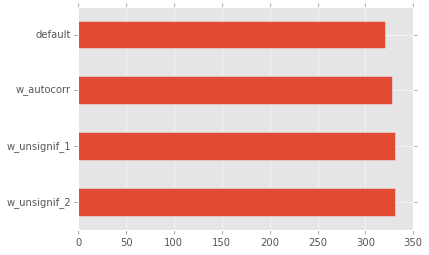

In [22]:
srmse = z.pd.Series(data=rmse.values(),index=rmse.keys())
srmse.sort(ascending=False)
srmse.plot(kind='barh');